In [26]:
# import 
import data_loader
import numpy as np
import os
import tensorflow as tf
import math
import timeit
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# data loader
loader = data_loader.DataLoader("UniRep1900_BareNucRepr.csv")
(x_train, x_val, x_test), (y_train, y_val, y_test) = loader.loadTrainValTest()
# reshape y
y_train = np.reshape(y_train, newshape = (len(y_train), 1))
y_val = np.reshape(y_val, newshape = (len(y_val), 1))
y_test = np.reshape(y_test, newshape = (len(y_test), 1))

In [28]:
# data information
print(x_train.shape)
print(np.max(y_train))
print(np.min(y_train))
print((np.linalg.norm(y_train)**2)/2467)
print(np.mean(y_train))
print((np.linalg.norm(y_train - np.mean(y_train))**2)/2467)

(2792, 1900)
7.8463
-1.9495
4.9260709703729235
0.3241966690544412
4.807121267579661


In [29]:
# # model definition
# USE_GPU = True
# device = "/device:GPU:0"
# initializer = tf.initializers.VarianceScaling(scale=2.0)
# # initializer = tf.initializers.random_normal_initializer()
# # num_classes = 1900/2

# layers = [
#     tf.keras.layers.Input(shape=(1900,)),
#     tf.keras.layers.Dense(900, activation='relu',
#                           kernel_initializer=initializer),
#     tf.keras.layers.Dropout(0.4),
#           tf.keras.layers.Dense(300, activation='relu',
#                           kernel_initializer=initializer),
#     tf.keras.layers.Dropout(0.4),
#           tf.keras.layers.Dense(100, activation='relu',
#                           kernel_initializer=initializer),
#     tf.keras.layers.Dropout(0.4),
#           tf.keras.layers.Dense(1,
#                           kernel_initializer=initializer)
#         ]

# model = tf.keras.Sequential(layers)
# print(model.summary())

# # train_losses = []
# n_epochs = 50
# val_losses = []
# learning_rates = [5e-4] #5e-5, 1e-4,  
# for lr in learning_rates:
#     print(lr)
#     optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
#     model.compile(optimizer=optimizer,
#                 loss='mean_squared_error',
#                 metrics=["mean_squared_error", "mean_absolute_error"])
#     output = model.fit(x_train, y_train, 
#                        batch_size=128, 
#                        epochs=n_epochs, 
#                        validation_data=(x_val, y_val))
# #     train_losses.append()
# #     test_output = model.evaluate(x_test, y_test)
    
#     train_losses = output.history.get("mean_squared_error")
#     train_mae = output.history.get("mean_absolute_error")
#     print(output.history.keys()) # gives dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])
#     val_losses = output.history.get("val_mean_squared_error")
#     val_mae = output.history.get("val_mean_absolute_error")
#     plt.plot(range(n_epochs), train_losses)
#     plt.plot(range(n_epochs), val_losses)
#     plt.xlabel("Epoch number")
#     plt.ylim([0,5])
#     plt.ylabel("Loss")
#     plt.legend(["Training loss", "Validation loss"])
#     plt.show()
    
#     plt.plot(range(n_epochs), train_mae)
#     plt.plot(range(n_epochs), val_mae)
#     plt.xlabel("Epoch number")
#     plt.ylim([0,5])
#     plt.ylabel("Loss")
#     plt.legend(["Training MAE", "Validation MAE"])
#     plt.show()
    
    
#     train_pred = model.predict(x_train)
#     plt.scatter(y_train, train_pred)
#     plt.xlabel("True Y")
#     plt.ylabel("Predicted Y")
#     plt.title("Training data")
#     plt.show()
    
#     val_pred = model.predict(x_val)
#     plt.scatter(y_val, val_pred)
#     plt.xlabel("True Y")
#     plt.ylabel("Predicted Y")
#     plt.title("Validation data")
#     plt.show()
    
# #     print("test loss shape", len(output.history.get("mean_squared_error")))
# #     test_loss.append(test_output.history.get("mean_squared_error"))
    
# # plt.plot(learning_rates, val_losses)
# # plt.xlabel("Learning rate")
# # plt.ylabel("Validation loss")
# # plt.show()    

In [30]:
!pip install keras

In [36]:
# helper funcs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.python.keras.backend as K
from time import time
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

def modelTrain(model, data, lr, n_epoch, batch_size=128, verbose=0):
    x_train, y_train, x_val, y_val = data
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # model compile
    model.compile(optimizer=optimizer, loss='mean_squared_error', 
                  metrics=["mean_squared_error", "mean_absolute_error"])
    tic = time()
    history = model.fit(x_train, y_train, epochs=n_epoch, validation_data=(x_val, y_val),
                        batch_size=batch_size, verbose=verbose)
    print("Time used to train: {}mins, {}secs".format(round((time()-tic)/60), int((time()-tic)%60)))
    metrics = modelEval(model, (x_val, y_val))
    return history.history, metrics
    
def modelEval(model, test_data):
    x_test, y_test = test_data
    preds = model.predict(x_test)
    # return MAE and MSE
    return tf.losses.MAE(y_test, preds), tf.losses.MSE(y_test, preds)

def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

Num GPUs Available:  0


In [37]:
# model definition
initializer = tf.initializers.VarianceScaling(scale=2.0)
model_v1 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer),
        layers.Dense(300, activation='relu', kernel_initializer=initializer),
        layers.Dense(100, activation='relu', kernel_initializer=initializer),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
print(model_v1.summary())
model_v1.save_weights('initial_weights_v1.h5') 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 900)               1710900   
_________________________________________________________________
dense_29 (Dense)             (None, 300)               270300    
_________________________________________________________________
dense_30 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 2,011,401
Trainable params: 2,011,401
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# experiment 0: testing epoch
# model compile
N_EPOCH = int(50)
history, val_mae = modelTrain(model_v1, (x_train, y_train, x_val, y_val), lr=5e-4, n_epoch=N_EPOCH, verbose=1)

Epoch 1/50
22/22 [==============================] - 0s 13ms/step - loss: 1.8655 - mean_squared_error: 1.8655 - mean_absolute_error: 0.8197 - val_loss: 0.6968 - val_mean_squared_error: 0.6968 - val_mean_absolute_error: 0.4696
Epoch 2/50
22/22 [==============================] - 0s 7ms/step - loss: 0.9001 - mean_squared_error: 0.9001 - mean_absolute_error: 0.5499 - val_loss: 0.7456 - val_mean_squared_error: 0.7456 - val_mean_absolute_error: 0.5695
Epoch 3/50
22/22 [==============================] - 0s 7ms/step - loss: 0.8177 - mean_squared_error: 0.8177 - mean_absolute_error: 0.5390 - val_loss: 0.7312 - val_mean_squared_error: 0.7312 - val_mean_absolute_error: 0.4470
Epoch 4/50
22/22 [==============================] - 0s 7ms/step - loss: 0.8026 - mean_squared_error: 0.8026 - mean_absolute_error: 0.5234 - val_loss: 0.8521 - val_mean_squared_error: 0.8521 - val_mean_absolute_error: 0.5990
Epoch 5/50
22/22 [==============================] - 0s 7ms/step - loss: 0.7581 - mean_squared_error: 0.

<Figure size 576x432 with 0 Axes>

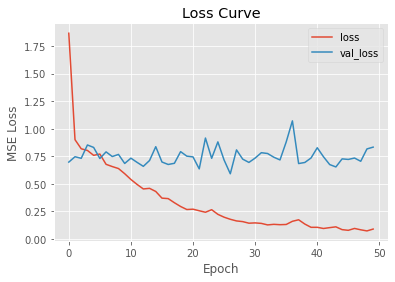

In [45]:
from updated_plots import plotTrainCurve, plotActualVsPred
plotTrainCurve({"loss":history["loss"], "val_loss":history["val_loss"]}, y_label='MSE Loss')

Observations: Overfitting in very early epochs; Learning rate could be smaller

In [40]:
# experiment 1: learning rate = 1e-6 to 1e-(3.3), size of 11
# 3 hidden layer model wo dropout
learning_rates = [10**n for n in np.arange(-6, -3, step=3/10)]
history_lst_1 = []
val_mae_lst_1 = []
val_mse_lst_1 = []
for lr in learning_rates:
    model_v1.load_weights('initial_weights_v1.h5')
    hist, metrics = modelTrain(model_v1, (x_train, y_train, x_val, y_val), lr, N_EPOCH)
    history_lst_1.append(hist)
    val_mae_lst_1.append(metrics[0])
    val_mse_lst_1.append(metrics[1])

Time used to train: 0mins, 9secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 9secs


In [46]:
print([np.mean(mae) for mae in val_mae_lst_1])
print([np.mean(mse) for mse in val_mse_lst_1])

[0.7319421, 0.6318563, 0.5137269, 0.4756328, 0.46688992, 0.46355876, 0.48316473, 0.54966354, 0.45908916, 0.40917206]
[1.7260784, 1.1223755, 0.74724084, 0.68809044, 0.6784892, 0.665496, 0.69182104, 0.7860672, 0.7011642, 0.6121667]


Observations: Learning rate can be smaller

In [50]:
# experiment 1.2: learning rate = 1e-9 to 1e-6, size of 3
# 3 hidden layer model wo dropout
learning_rates = [10**n for n in np.arange(-9, -6, step=3/3)]
history_lst_1_2 = []
val_mae_lst_1_2 = []
val_mse_lst_1_2 = []
for lr in learning_rates:
    model_v1.load_weights('initial_weights_v1.h5') 
    hist, metrics = modelTrain(model_v1, (x_train, y_train, x_val, y_val), lr, N_EPOCH)
    history_lst_1_2.append(hist)
    val_mae_lst_1_2.append(metrics[0])
    val_mse_lst_1_2.append(metrics[1])

Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs


In [53]:
print([np.mean(mae) for mae in val_mae_lst_1_2])
print([np.mean(mse) for mse in val_mse_lst_1_2])

[0.87877995, 0.879908, 0.887417]
[2.9168215, 2.8964121, 2.7132697]


In [55]:
# optimal learning rate
learning_rates = [10**n for n in np.arange(-6, -3, step=3/10)]
print(learning_rates)
print(learning_rates[5])

[1e-06, 1.9952623149688787e-06, 3.981071705534969e-06, 7.943282347242805e-06, 1.5848931924611107e-05, 3.162277660168373e-05, 6.309573444801917e-05, 0.00012589254117941636, 0.0002511886431509572, 0.0005011872336272705]
3.162277660168373e-05


Observations: Learning rate can be larger

In [16]:
# experiment 1.3: learning rate = 1e-3 to 1e-1, size of 3
# 3 hidden layer model wo dropout
learning_rates = [10**n for n in np.arange(-3, -1, step=2/3)]
history_lst_1_3 = []
val_mae_lst_1_3 = []
for lr in learning_rates:
    model_v1.load_weights('initial_weights_v1.h5') 
    hist, val_mae = modelTrain(model_v1, (x_train, y_train, x_val, y_val), lr, N_EPOCH)
    history_lst_1_3.append(hist)
    val_mae_lst_1_3.append(val_mae)

Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs
Time used to train: 0mins, 8secs


In [17]:
[np.mean(mae) for mae in val_mae_lst_1_3]

[0.4309049912548588, 0.5163697327883203, 0.45109622239374936]

<Figure size 576x432 with 0 Axes>

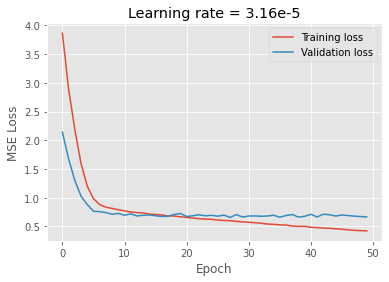

In [84]:
plotTrainCurve({'Training loss':history_lst_1[5]['loss'],
               'Validation loss':history_lst_1[5]['val_loss']},
              title='Learning rate = 3.16e-5',
              save=True)

<Figure size 576x432 with 0 Axes>

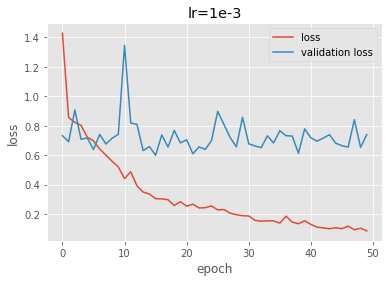

<Figure size 576x432 with 0 Axes>

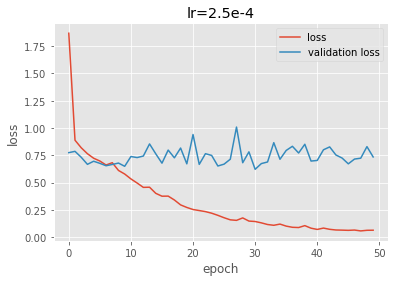

<Figure size 576x432 with 0 Axes>

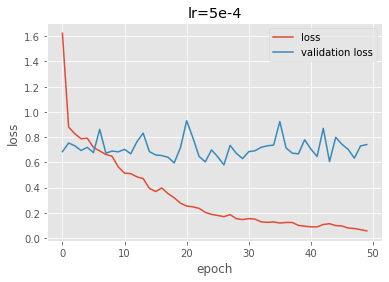

In [19]:
plotTrainCurve({'loss':history_lst_1_3[0]['loss'],
               'validation loss':history_lst_1_3[0]['val_loss']},
               title='lr=1e-3',save=True)
plotTrainCurve({'loss':history_lst_1[8]['loss'],
               'validation loss':history_lst_1[8]['val_loss']},
               title='lr=2.5e-4',save=True)
plotTrainCurve({'loss':history_lst_1[9]['loss'],
               'validation loss':history_lst_1[9]['val_loss']},
               title='lr=5e-4',save=True)

In [71]:
LR = 3.16e-5

In [72]:
# experiment 2: Dropout 0.2, 0.4
model_v2 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer),
        # layers.Dropout(0.1),
        layers.Dense(300, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.1),
        layers.Dense(100, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.1),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
# print(model_v2.summary())
model_v2.save_weights('initial_weights_v2.h5') 

model_v3 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer),
        # layers.Dropout(0.2),
        layers.Dense(300, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.2),
        layers.Dense(100, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.2),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
# print(model_v3.summary())
model_v3.save_weights('initial_weights_v3.h5') 

model_v4 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer),
        # layers.Dropout(0.4),
        layers.Dense(300, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.4),
        layers.Dense(100, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.4),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
# print(model_v4.summary())
model_v4.save_weights('initial_weights_v4.h5')

model_v5 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer),
        # layers.Dropout(0.5),
        layers.Dense(300, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.5),
        layers.Dense(100, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.5),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
# print(model_v4.summary())
model_v5.save_weights('initial_weights_v5.h5') 

model_v6 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer),
        # layers.Dropout(0.6),
        layers.Dense(300, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.6),
        layers.Dense(100, activation='relu', kernel_initializer=initializer),
        layers.Dropout(0.6),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
# print(model_v4.summary())
model_v6.save_weights('initial_weights_v6.h5') 

In [73]:
from functools import partial
modelTrainPartial = partial(modelTrain, data=(x_train, y_train, x_val, y_val), lr=LR, n_epoch=N_EPOCH)
history_lst_2 = []
val_mae_lst_2 = []
val_mse_lst_2 = []
for model in [model_v2, model_v3, model_v4, model_v5, model_v6]:
    history, metrics = modelTrainPartial(model)
    history_lst_2.append(history)
    val_mae_lst_2.append(metrics[0])
    val_mse_lst_2.append(metrics[1])

Time used to train: 0mins, 9secs
Time used to train: 0mins, 9secs
Time used to train: 0mins, 9secs
Time used to train: 0mins, 9secs
Time used to train: 0mins, 9secs


<Figure size 576x432 with 0 Axes>

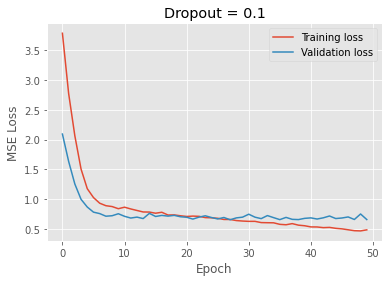

<Figure size 576x432 with 0 Axes>

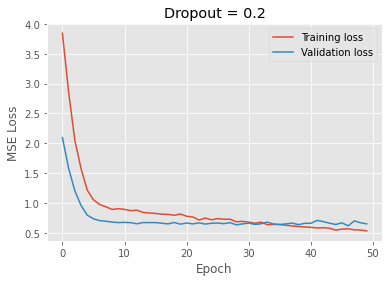

<Figure size 576x432 with 0 Axes>

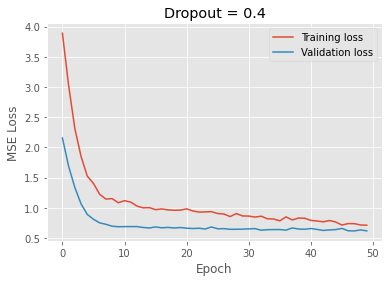

<Figure size 576x432 with 0 Axes>

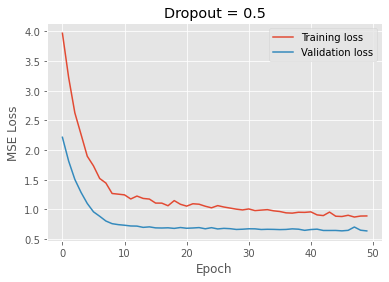

<Figure size 576x432 with 0 Axes>

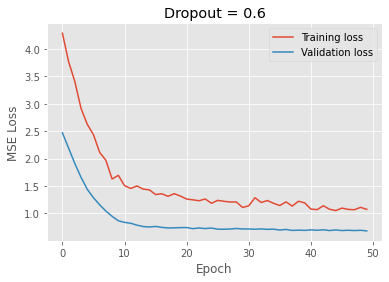

In [81]:
dropouts = [0.1, 0.2, 0.4, 0.5, 0.6]
for i, history in enumerate(history_lst_2):
    plotTrainCurve({"Training loss":history["loss"], "Validation loss":history["val_loss"]},
                  title='Dropout = '+str(dropouts[i]),
                  save=True)

<Figure size 864x864 with 0 Axes>

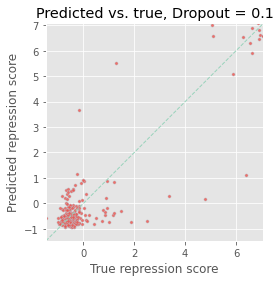

<Figure size 864x864 with 0 Axes>

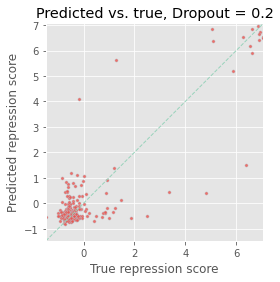

<Figure size 864x864 with 0 Axes>

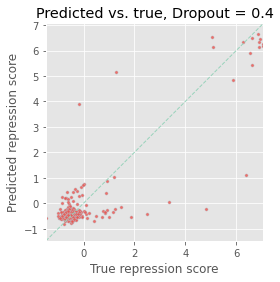

<Figure size 864x864 with 0 Axes>

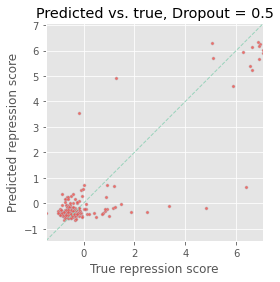

<Figure size 864x864 with 0 Axes>

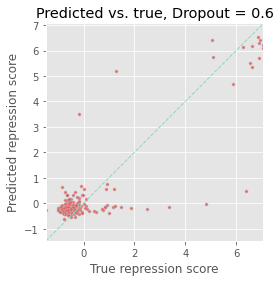

In [83]:
for i, model in enumerate([model_v2, model_v3, model_v4, model_v5, model_v6]):
    preds = model.predict(x_val)
    plotActualVsPred(y_val, preds, title='Predicted vs. true, Dropout = '+str(dropouts[i]), save=True)

In [78]:
print([np.mean(mae) for mae in val_mae_lst_2])
print([np.mean(mse) for mse in val_mse_lst_2])

[0.43484268, 0.43626368, 0.4078108, 0.44037813, 0.5092522]
[0.66109985, 0.6519441, 0.6194064, 0.63800275, 0.68132174]


Observation: The last graph looks the best, but probably would hurt performance

In [93]:
# experiment 3: Regularizer?
from tensorflow.keras import regularizers
regu1 = regularizers.l1_l2(l1=1e-4)
regu2 = regularizers.l1_l2(l2=1e-3)
regu3 = regularizers.l1_l2(l1=1e-4, l2=1e-3)

model_v7 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu1),
        layers.Dense(300, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu1),
        layers.Dropout(0.4),
        layers.Dense(100, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu1),
        layers.Dropout(0.4),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
# print(model_v4.summary())
model_v7.save_weights('initial_weights_v7.h5') 

model_v8 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu2),
        layers.Dense(300, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu2),
        layers.Dropout(0.4),
        layers.Dense(100, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu2),
        layers.Dropout(0.4),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
# print(model_v4.summary())
model_v8.save_weights('initial_weights_v8.h5') 

model_v9 = keras.Sequential(
    [
        layers.Input(shape=(1900,)),
        layers.Dense(900, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu3),
        layers.Dense(300, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu3),
        layers.Dropout(0.4),
        layers.Dense(100, activation='relu', kernel_initializer=initializer,
                    kernel_regularizer=regu3),
        layers.Dropout(0.4),
        layers.Dense(1, kernel_initializer=initializer)
    ]
)
# print(model_v4.summary())
model_v9.save_weights('initial_weights_v9.h5') 

In [104]:
model_parital_v2 = partial(modelTrain, data=(x_train, y_train, x_val, y_val), lr=LR, n_epoch=500)

In [105]:
history_lst_3 = []
val_mae_lst_3 = []
val_mse_lst_3 = []
for model in [model_v7, model_v8, model_v9]:
    history, metrics = model_parital_v2(model)
    history_lst_3.append(history)
    val_mae_lst_3.append(metrics[0])
    val_mse_lst_3.append(metrics[1])

Time used to train: 2mins, 55secs
Time used to train: 2mins, 56secs
Time used to train: 2mins, 58secs


<Figure size 576x432 with 0 Axes>

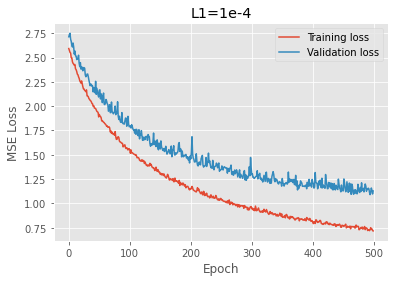

<Figure size 576x432 with 0 Axes>

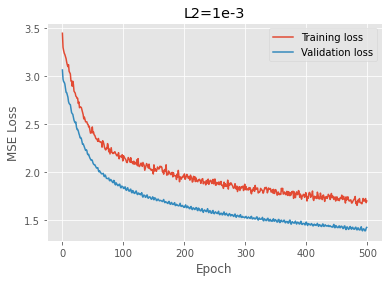

<Figure size 576x432 with 0 Axes>

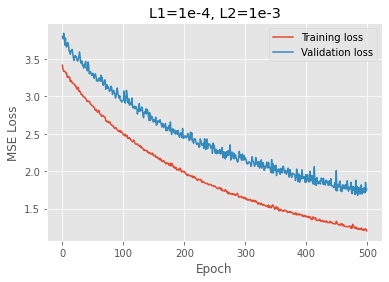

In [106]:
names = ["L1 = 1e-4","L2 = 1e-3","L1 = 1e-4, L2 = 1e-3"]
for i, history in enumerate(history_lst_3):
    plotTrainCurve({"Training loss":history["loss"], "Validation loss":history["val_loss"]},
                   title=names[i], save=True)

In [108]:
print([np.mean(mae) for mae in val_mae_lst_3])
print([np.mean(mse) for mse in val_mse_lst_3])

[0.42904457, 0.509634, 0.4544422]
[0.629463, 0.7258382, 0.7029601]


Observation: Non of them are satisfying

In [109]:
# model result
history, val_mae = modelTrain(model_v7, data=(x_train, y_train, x_val, y_val), lr=LR, n_epoch=2000)

Time used to train: 8mins, 49secs


<Figure size 576x432 with 0 Axes>

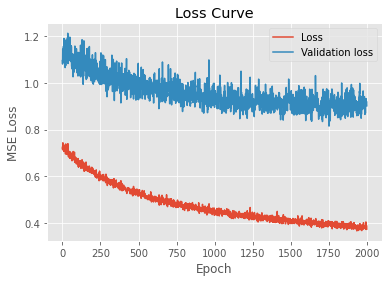

In [110]:
plotTrainCurve({"Loss":history["loss"], "Validation loss":history["val_loss"]},
              save=True)

<Figure size 864x864 with 0 Axes>

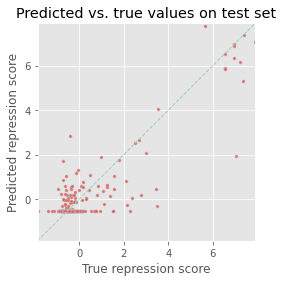

In [130]:
preds = model_v7.predict(x_test)
plotActualVsPred(y_test, preds, title="Predicted vs. true values on test set", save=True)

In [128]:
metrics = modelEval(model_v7, (x_test, y_test))
print("MAE", np.mean(metrics[0]))
print("MSE", np.mean(metrics[1]))

MAE 0.4755583
MSE 0.690963


In [40]:
mae = modelEval(model_v4, (x_val, y_val))
np.mean(mae)

0.42290360691015044

In [11]:
nuc_csv = pd.read_csv("UniRep1900_BareNucRepr.csv")
nuc_info = pd.read_csv("nuc_info.csv")

nuc_csv_gene_name = pd.merge(nuc_info[["label", "Extended Domain sequence"]],nuc_csv,
                             how="inner", on="Extended Domain sequence")
idx = list(np.where((train_pred < 0) & (y_train > 1.5))[0])
nuc_csv_gene_name.loc[idx,'label']

115           Short_nuclear_domain;ATM_HUMAN;FATC;2976;31
240         Short_nuclear_domain;CEBPG_HUMAN;bZIP_2;47;53
268         Short_nuclear_domain;CHD2_HUMAN;Chromo;372;69
286         Short_nuclear_domain;CHD9_HUMAN;Chromo;681;62
504          Short_nuclear_domain;ELOA1_HUMAN;Med26;36;51
518            Short_nuclear_domain;EPN3_HUMAN;UIM;204;16
643             Short_nuclear_domain;GID8_HUMAN;LisH;1;26
677        Short_nuclear_domain;HELZ_HUMAN;zf-CCCH;152;26
866        Short_nuclear_domain;IN80B_HUMAN;PAPA-1;210;79
895          Short_nuclear_domain;JDP2_HUMAN;bZIP_1;61;63
903         Short_nuclear_domain;JUND_HUMAN;bZIP_1;257;63
922         Short_nuclear_domain;KDM4A_HUMAN;PHD_2;709;35
925            Short_nuclear_domain;KDM4B_HUMAN;JmjN;1;34
1131         Short_nuclear_domain;MEX3D_HUMAN;KH_1;171;62
1214           Short_nuclear_domain;MYOG_HUMAN;Basic;1;80
1217         Short_nuclear_domain;MYT1_HUMAN;zf-C2HC;3;28
1237         Short_nuclear_domain;NBN_HUMAN;Nbs1_C;674;63
1414         S

In [102]:
nucrepr_data = pd.read_csv("./data/NucRepr_data.csv")
nuc_csv_gene_name = pd.merge(nucrepr_data[["label", "Standard Error ReprD5", "Extended Domain sequence"]],nuc_csv,
                             how="inner", on="Extended Domain sequence")

train_idx = np.arange(x_train.shape[0])
nucrepr_data.loc[train_idx, "label"]

0        Short_nuclear_domain;41_HUMAN;FERM_N;205;63
1            Short_nuclear_domain;41_HUMAN;FA;480;43
2           Short_nuclear_domain;41_HUMAN;SAB;651;48
3        Short_nuclear_domain;A1CF_HUMAN;RRM_1;52;69
4       Short_nuclear_domain;A1CF_HUMAN;RRM_1;130;65
                            ...                     
2462     Short_nuclear_domain;PHF23_HUMAN;PHD;323;46
2463       Short_nuclear_domain;PHF8_HUMAN;PHD;27;49
2464     Short_nuclear_domain;PHIP_HUMAN;WD40;151;37
2465     Short_nuclear_domain;PHIP_HUMAN;WD40;194;38
2466     Short_nuclear_domain;PHIP_HUMAN;WD40;237;41
Name: label, Length: 2467, dtype: object

In [103]:
def onehot_encode(aaseq: str):
    """
    Convert AA sequence to onehot encoding numpy array.
    Args:
        aaseq - str
    Returns:
        onehotarr - (lenseq, 20) np.array
    """
    alphabet = 'GALMFWKQESPVICYHRNDT'
    aa2int = {k: i for i,k in enumerate(alphabet)}
    #int2aa = {i: k for i,k in enumerate(alphabet)}

    lenseq = len(aaseq)
    onehotarr = np.zeros((lenseq, 20), dtype=int)
    for i,aa in enumerate(aaseq):
        onehotarr[i, aa2int[aa]] = 1

    return onehotarr

nucrepr_data["one_hot_encoding"]
# nucrepr_data["one_hot_encoding"] = tf.keras.utils.to_categorical(nucrepr_data["Extended Domain sequence"], 
#                                                                  num_classes = 20)

ValueError: invalid literal for int() with base 10: 'KHRNMHCKVSLLDDTVYECVVEKHAKGQDLLKRVCEHLNLLEEDYFGLAIWDNATSKTWLDSAKEIKKQVRGVPWNFTFN'